In [1]:
import warnings
warnings.filterwarnings('ignore')

#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [2]:
cars = pd.read_csv('CarPrice.csv')
cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
cars.shape

(205, 26)

In [4]:
cars.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [5]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [6]:
cars['CarName'].head()

0          alfa-romero giulia
1         alfa-romero stelvio
2    alfa-romero Quadrifoglio
3                 audi 100 ls
4                  audi 100ls
Name: CarName, dtype: object

In [7]:
#Splitting company name from CarName column
CompanyName = cars['CarName'].apply(lambda x : x.split(' ')[0])
cars.insert(3,"CompanyName",CompanyName)
cars.drop(['CarName'],axis=1,inplace=True)
cars.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [8]:
cars.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [9]:
cars.CompanyName = cars.CompanyName.str.lower()

def replace_name(a,b):
    cars.CompanyName.replace(a,b,inplace=True)

replace_name('maxda','mazda')
replace_name('porcshce','porsche')
replace_name('toyouta','toyota')
replace_name('vokswagen','volkswagen')
replace_name('vw','volkswagen')

cars.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [10]:
cars.columns

Index(['car_ID', 'symboling', 'CompanyName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

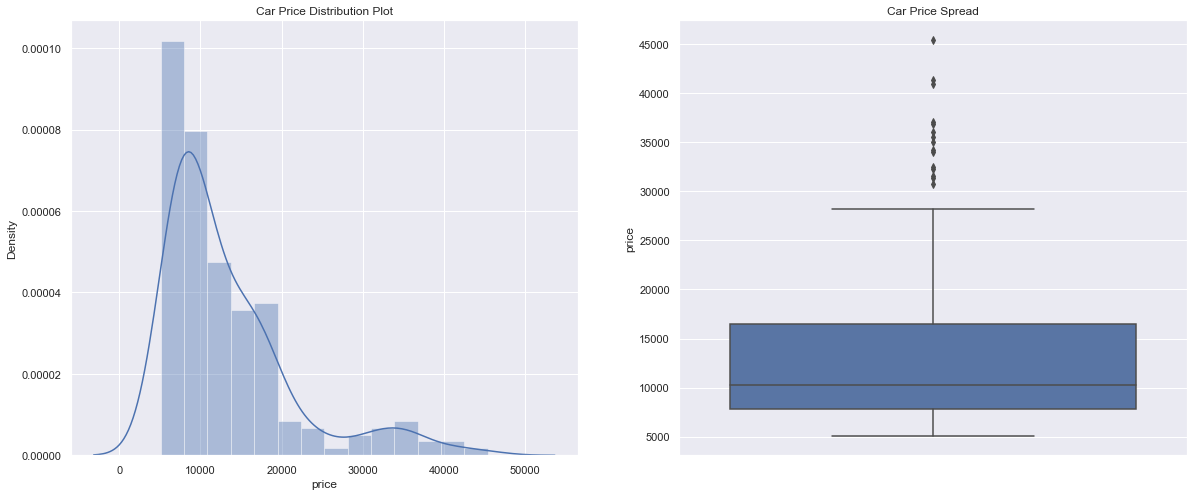

In [11]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Car Price Distribution Plot')
sns.distplot(cars.price)

plt.subplot(1,2,2)
plt.title('Car Price Spread')
sns.boxplot(y=cars.price)

plt.show()

In [12]:
print(cars.price.describe(percentiles = [0.25,0.50,0.75,0.85,0.90,1]))

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
85%      18500.000000
90%      22563.000000
100%     45400.000000
max      45400.000000
Name: price, dtype: float64


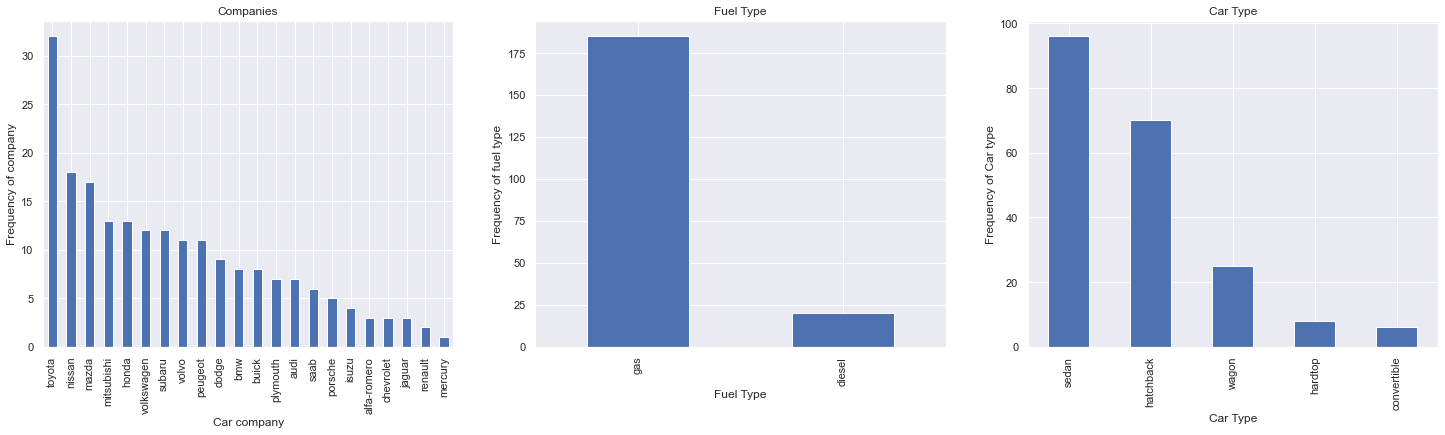

In [13]:
plt.figure(figsize=(25, 6))

plt.subplot(1,3,1)
plt1 = cars.CompanyName.value_counts().plot(kind = 'bar')
plt.title('Companies')
plt1.set(xlabel = 'Car company', ylabel='Frequency of company')

plt.subplot(1,3,2)
plt1 = cars.fueltype.value_counts().plot(kind = 'bar')
plt.title('Fuel Type')
plt1.set(xlabel = 'Fuel Type', ylabel='Frequency of fuel type')

plt.subplot(1,3,3)
plt1 = cars.carbody.value_counts().plot(kind = 'bar')
plt.title('Car Type')
plt1.set(xlabel = 'Car Type', ylabel='Frequency of Car type')

plt.show()

Actuarians call this process "symboling". A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.

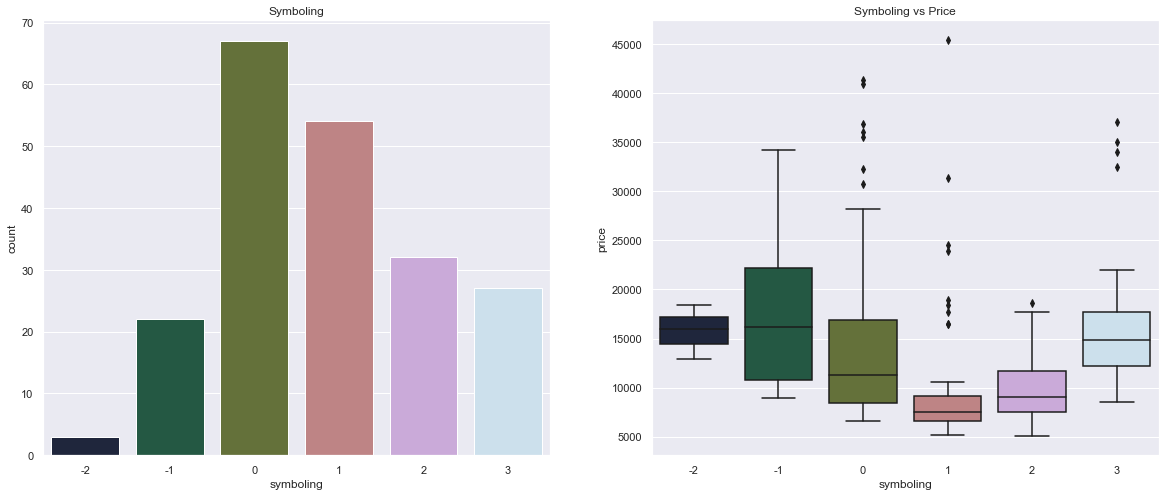

In [14]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Symboling')
sns.countplot(cars.symboling, palette=("cubehelix"))

plt.subplot(1,2,2)
plt.title('Symboling vs Price')
sns.boxplot(x=cars.symboling, y=cars.price, palette=("cubehelix"))

plt.show()

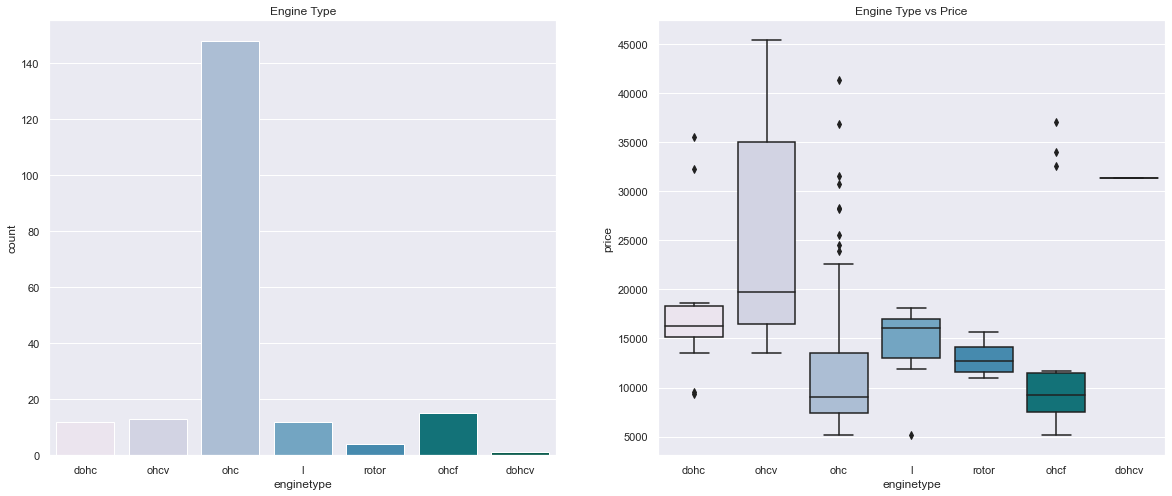

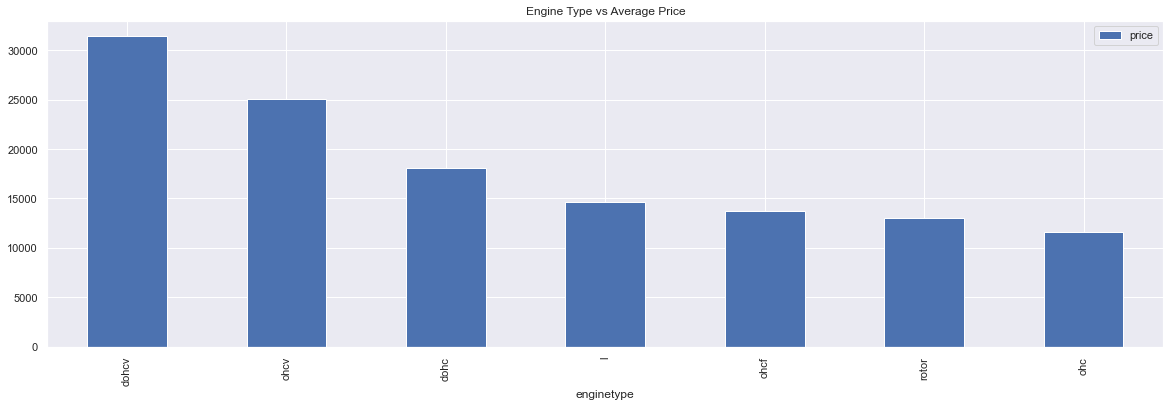

In [15]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Engine Type')
sns.countplot(cars.enginetype, palette=("PuBuGn"))

plt.subplot(1,2,2)
plt.title('Engine Type vs Price')
sns.boxplot(x=cars.enginetype, y=cars.price, palette=("PuBuGn"))

plt.show()

df = pd.DataFrame(cars.groupby(['enginetype'])['price'].mean().sort_values(ascending = False))
df.plot.bar(figsize=(20,6))
plt.title('Engine Type vs Average Price')
plt.show()

<Figure size 1800x432 with 0 Axes>

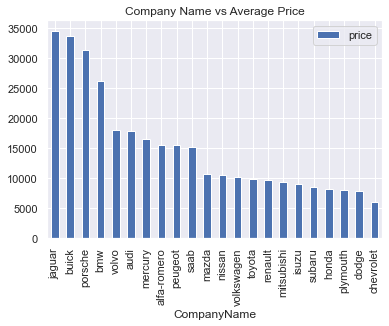

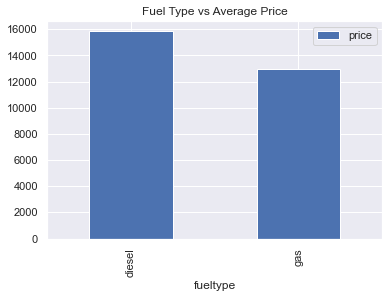

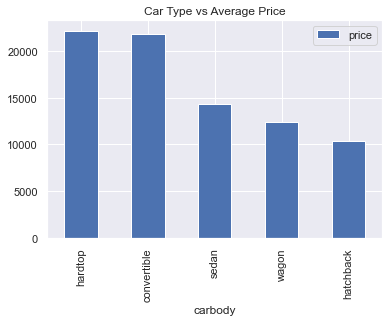

In [16]:
plt.figure(figsize=(25, 6))

df = pd.DataFrame(cars.groupby(['CompanyName'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Company Name vs Average Price')
plt.show()

df = pd.DataFrame(cars.groupby(['fueltype'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Fuel Type vs Average Price')
plt.show()

df = pd.DataFrame(cars.groupby(['carbody'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Car Type vs Average Price')
plt.show()

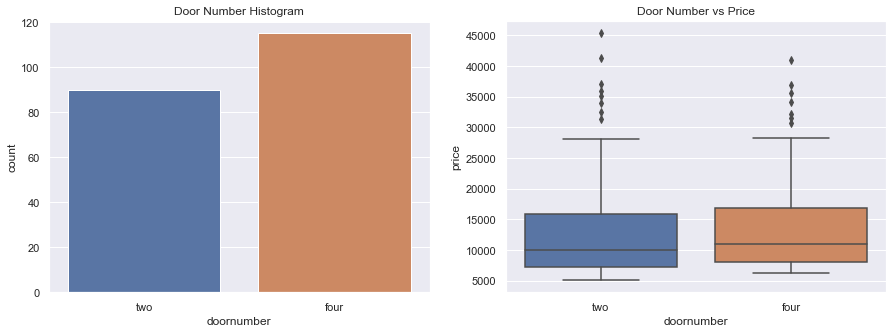

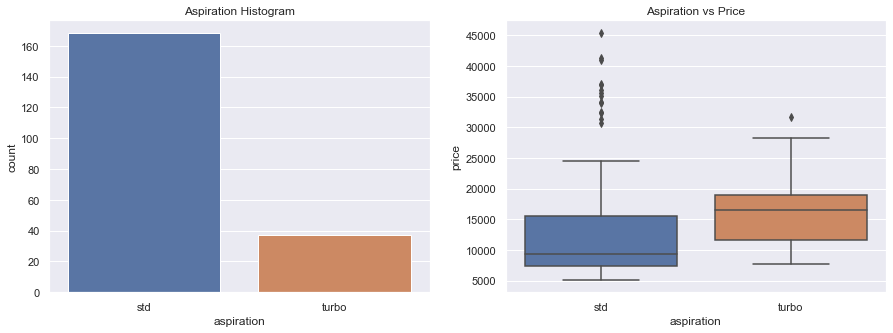

In [17]:
# diesel has higher average price than gas.
# hardtop and convertible have higher average price.
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Door Number Histogram')
sns.countplot(cars.doornumber)

plt.subplot(1,2,2)
plt.title('Door Number vs Price')
sns.boxplot(x=cars.doornumber, y=cars.price)

plt.show()

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Aspiration Histogram')
sns.countplot(cars.aspiration)

plt.subplot(1,2,2)
plt.title('Aspiration vs Price')
sns.boxplot(x=cars.aspiration, y=cars.price)

plt.show()

In [1]:
def plot_count(x,fig):
    plt.subplot(4,2,fig)
    plt.title(x+' Histogram')
    sns.countplot(cars[x],palette=("magma"))
    plt.subplot(4,2,(fig+1))
    plt.title(x+' vs Price')
    sns.boxplot(x=cars[x], y=cars.price, palette=("magma"))
    
plt.figure(figsize=(15,20))

plot_count('enginelocation', 1)
plot_count('cylindernumber', 3)
plot_count('fuelsystem', 5)
plot_count('drivewheel', 7)

plt.tight_layout()

NameError: name 'plt' is not defined

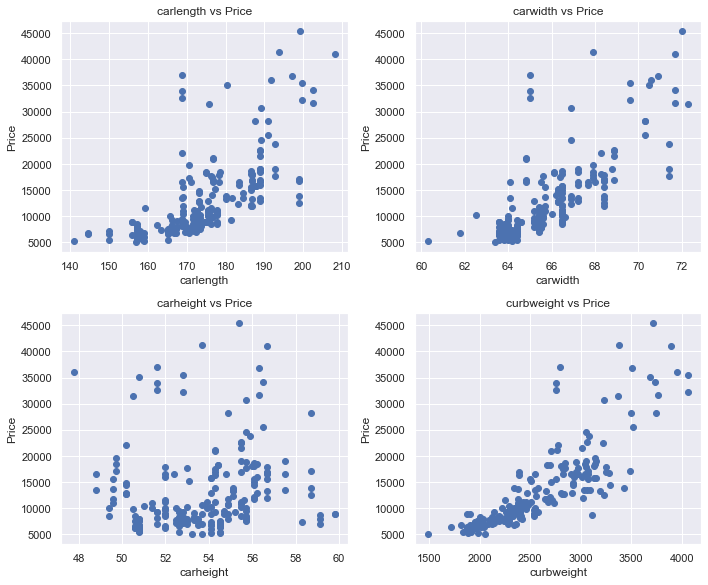

In [19]:
def scatter(x,fig):
    plt.subplot(5,2,fig)
    plt.scatter(cars[x],cars['price'])
    plt.title(x+' vs Price')
    plt.ylabel('Price')
    plt.xlabel(x)

plt.figure(figsize=(10,20))

scatter('carlength', 1)
scatter('carwidth', 2)
scatter('carheight', 3)
scatter('curbweight', 4)

plt.tight_layout()

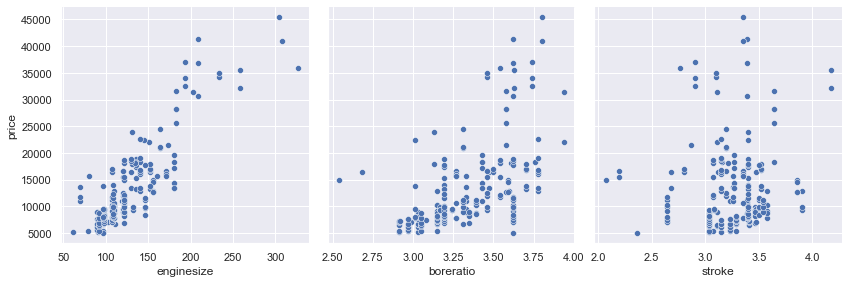

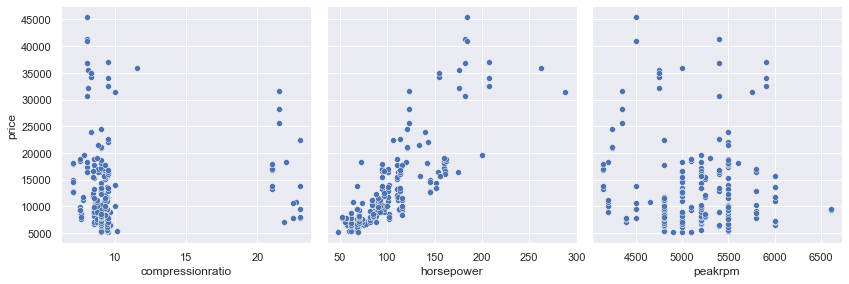

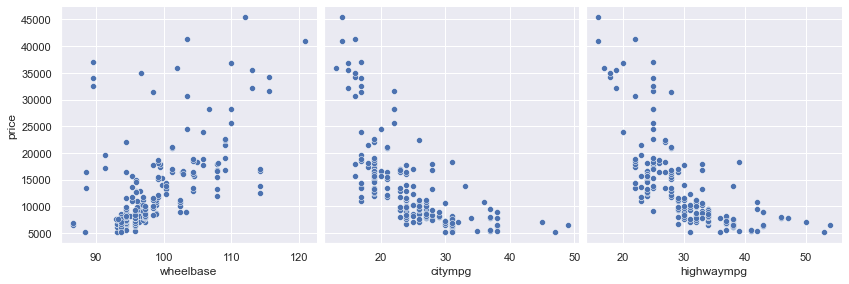

In [20]:
def pp(x,y,z):
    sns.pairplot(cars, x_vars=[x,y,z], y_vars='price',size=4, aspect=1, kind='scatter')
    plt.show()

pp('enginesize', 'boreratio', 'stroke')
pp('compressionratio', 'horsepower', 'peakrpm')
pp('wheelbase', 'citympg', 'highwaympg')

In [21]:
np.corrcoef(cars['carlength'], cars['carwidth'])[0,1]

0.841118268481846

In [22]:
cars[["citympg","highwaympg"]]

,citympg,highwaympg
0,21,27
1,21,27
2,19,26
3,24,30
4,18,22
5,19,25
6,19,25
7,19,25
8,17,20
9,16,22


In [23]:
cars['fueleconomy'] = (0.70 * cars['citympg']) + (0.30 * cars['highwaympg'])

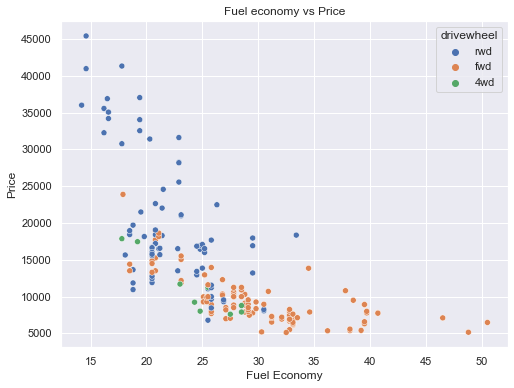

<Figure size 432x288 with 0 Axes>

In [24]:
plt.figure(figsize=(8,6))

plt.title('Fuel economy vs Price')
sns.scatterplot(x=cars['fueleconomy'],y=cars['price'],hue=cars['drivewheel'])
plt.xlabel('Fuel Economy')
plt.ylabel('Price')

plt.show()
plt.tight_layout()

In [25]:
cars.columns

Index(['car_ID', 'symboling', 'CompanyName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price', 'fueleconomy'],
      dtype='object')

In [26]:
cars_lr = cars[['price', 'fueltype', 'aspiration','carbody', 'drivewheel','wheelbase',
                  'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'boreratio','horsepower', 
                    'fueleconomy', 'carlength','carwidth']]
cars_lr.head()

,price,fueltype,aspiration,carbody,drivewheel,wheelbase,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth
0,13495.0,gas,std,convertible,rwd,88.6,2548,dohc,four,130,3.47,111,22.8,168.8,64.1
1,16500.0,gas,std,convertible,rwd,88.6,2548,dohc,four,130,3.47,111,22.8,168.8,64.1
2,16500.0,gas,std,hatchback,rwd,94.5,2823,ohcv,six,152,2.68,154,21.1,171.2,65.5
3,13950.0,gas,std,sedan,fwd,99.8,2337,ohc,four,109,3.19,102,25.8,176.6,66.2
4,17450.0,gas,std,sedan,4wd,99.4,2824,ohc,five,136,3.19,115,19.2,176.6,66.4


In [27]:
# Defining the map function
def dummies(x,df):
    temp = pd.get_dummies(df[x], drop_first = True)
    df = pd.concat([df, temp], axis = 1)
    df.drop([x], axis = 1, inplace = True)
    return df
# Applying the function to the cars_lr

cars_lr = dummies('fueltype',cars_lr)
cars_lr = dummies('aspiration',cars_lr)
cars_lr = dummies('carbody',cars_lr)
cars_lr = dummies('drivewheel',cars_lr)
cars_lr = dummies('enginetype',cars_lr)
cars_lr = dummies('cylindernumber',cars_lr)

In [28]:
cars_lr.head()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth,gas,turbo,hardtop,hatchback,sedan,wagon,fwd,rwd,dohcv,l,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two
0,13495.0,88.6,2548,130,3.47,111,22.8,168.8,64.1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
1,16500.0,88.6,2548,130,3.47,111,22.8,168.8,64.1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
2,16500.0,94.5,2823,152,2.68,154,21.1,171.2,65.5,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0
3,13950.0,99.8,2337,109,3.19,102,25.8,176.6,66.2,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0
4,17450.0,99.4,2824,136,3.19,115,19.2,176.6,66.4,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0


In [29]:
cor = np.abs(cars_lr.corr()["price"])
cor[cor > 0.5]

price          1.000000
wheelbase      0.577816
curbweight     0.835305
enginesize     0.874145
boreratio      0.553173
horsepower     0.808139
fueleconomy    0.693707
carlength      0.682920
carwidth       0.759325
fwd            0.601950
rwd            0.638957
four           0.697762
Name: price, dtype: float64

In [30]:
feature = cor[cor > 0.5].index

In [31]:
cars_lr = cars_lr.loc[:,feature]
cars_lr.head()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth,fwd,rwd,four
0,13495.0,88.6,2548,130,3.47,111,22.8,168.8,64.1,0,1,1
1,16500.0,88.6,2548,130,3.47,111,22.8,168.8,64.1,0,1,1
2,16500.0,94.5,2823,152,2.68,154,21.1,171.2,65.5,0,1,0
3,13950.0,99.8,2337,109,3.19,102,25.8,176.6,66.2,1,0,1
4,17450.0,99.4,2824,136,3.19,115,19.2,176.6,66.4,0,0,0


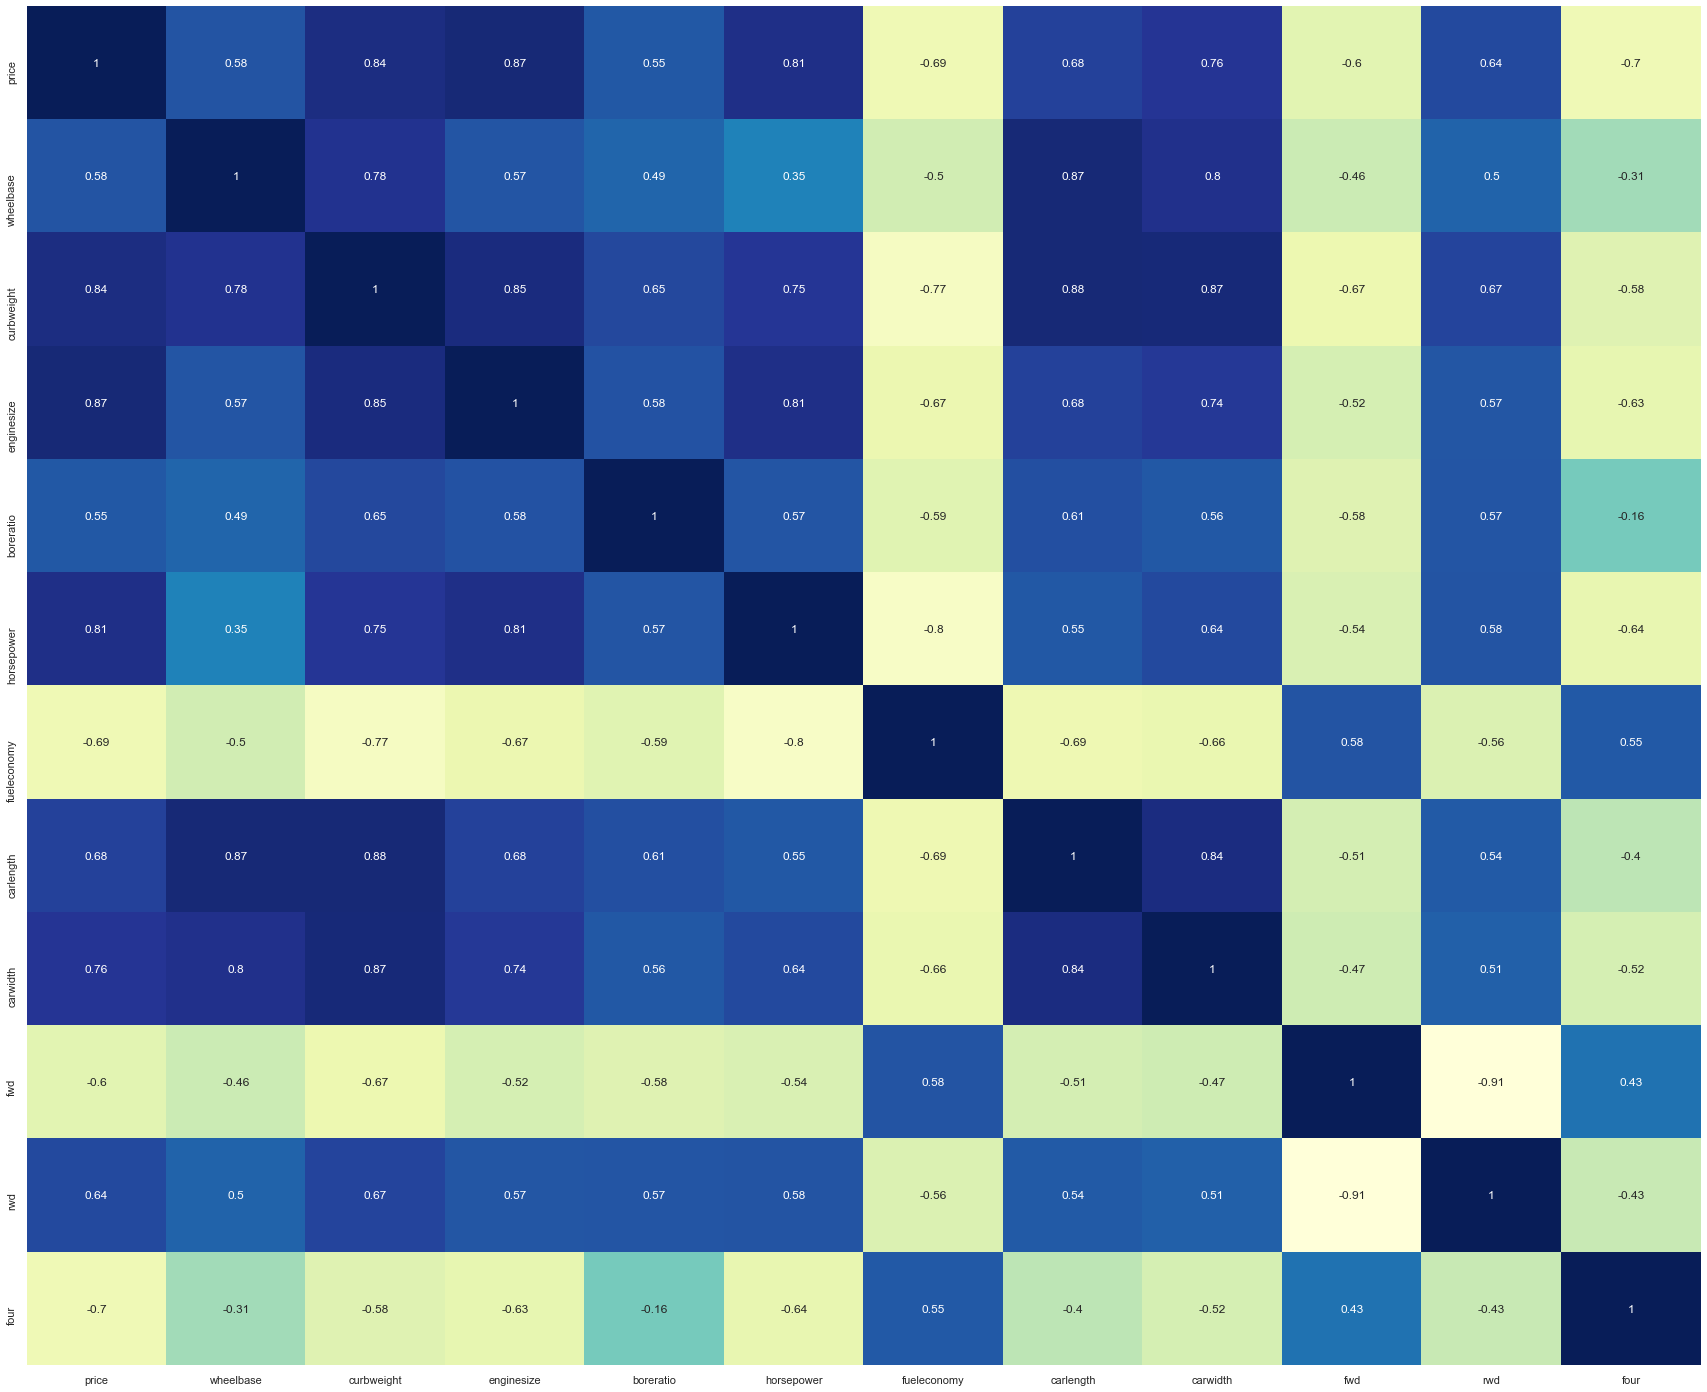

In [32]:
#Correlation using heatmap

plt.figure(figsize = (30, 25))
sns.heatmap(cars_lr.corr(), annot = True, cmap="YlGnBu", cbar = False)
plt.show()

In [33]:
cars_lr.shape

(205, 12)

In [34]:
y = cars_lr["price"]
X = cars_lr[feature[1:]]

In [35]:
cars_lr

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth,fwd,rwd,four
0,13495.000,88.6,2548,130,3.47,111,22.8,168.8,64.1,0,1,1
1,16500.000,88.6,2548,130,3.47,111,22.8,168.8,64.1,0,1,1
2,16500.000,94.5,2823,152,2.68,154,21.1,171.2,65.5,0,1,0
3,13950.000,99.8,2337,109,3.19,102,25.8,176.6,66.2,1,0,1
4,17450.000,99.4,2824,136,3.19,115,19.2,176.6,66.4,0,0,0
5,15250.000,99.8,2507,136,3.19,110,20.8,177.3,66.3,1,0,0
6,17710.000,105.8,2844,136,3.19,110,20.8,192.7,71.4,1,0,0
7,18920.000,105.8,2954,136,3.19,110,20.8,192.7,71.4,1,0,0
8,23875.000,105.8,3086,131,3.13,140,17.9,192.7,71.4,1,0,0
9,17859.167,99.5,3053,131,3.13,160,17.8,178.2,67.9,0,0,0


In [36]:
X

,wheelbase,curbweight,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth,fwd,rwd,four
0,88.6,2548,130,3.47,111,22.8,168.8,64.1,0,1,1
1,88.6,2548,130,3.47,111,22.8,168.8,64.1,0,1,1
2,94.5,2823,152,2.68,154,21.1,171.2,65.5,0,1,0
3,99.8,2337,109,3.19,102,25.8,176.6,66.2,1,0,1
4,99.4,2824,136,3.19,115,19.2,176.6,66.4,0,0,0
5,99.8,2507,136,3.19,110,20.8,177.3,66.3,1,0,0
6,105.8,2844,136,3.19,110,20.8,192.7,71.4,1,0,0
7,105.8,2954,136,3.19,110,20.8,192.7,71.4,1,0,0
8,105.8,3086,131,3.13,140,17.9,192.7,71.4,1,0,0
9,99.5,3053,131,3.13,160,17.8,178.2,67.9,0,0,0


In [37]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
num_vars = cars_lr.columns
cars_lr[num_vars] = scaler.fit_transform(cars_lr[num_vars])

In [38]:
cars.shape, cars_lr.shape

((205, 27), (205, 12))

In [39]:
cars_lr["price"] = cars["price"]

In [40]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test \
= train_test_split(X,y, test_size=0.25, train_size=0.75, random_state=0)

In [41]:
print(f"X_train {X_train.shape} \nX_test {X_test.shape} \n\
y_train {y_train.shape} \ny_test {y_test.shape}")

X_train (153, 11) 
X_test (52, 11) 
y_train (153,) 
y_test (52,)


In [42]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [43]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [44]:
print(f"Coefficients : {model.coef_}")
print(f"intercept : {model.intercept_}")

Coefficients : [ 6.26373699e+00  6.24744920e-01  6.23123549e+01  1.72647857e+03
  4.62936438e+01  1.12006638e+02 -6.81014573e+00  5.63220755e+02
 -3.15313172e+02  2.35287170e+03 -4.18667375e+03]
intercept : -43886.2126167713


In [45]:
y_pred = model.predict(X_test)
y_pred

array([ 6217.41358049, 22460.84424539, 15527.91368206,  6796.23406986,
        9422.49504661, 15924.65271302,  6884.15341225,  5683.26879608,
       24974.40610854,  6205.03753545, 20209.0336558 , 35768.25795056,
       13295.5963909 , 14006.82013073,  6659.65921833, 15844.68536321,
       11253.34473113, 18612.30668961,  8694.2856044 ,  5786.29290684,
        9860.85135175, 14274.90928886, 11267.32984602, 15946.51878524,
       23926.22200276,  7247.75169987,  7100.26921011, 14362.48348732,
        6868.26848546,  6542.41889853,  8816.84723094,  9649.56357806,
       19153.61808204, 10956.65147346,  6573.03139963, 27841.77263079,
        8007.92543802, 13592.07969036,  5824.12311118, 36341.34016023,
        6637.79314612, 16152.11227527, 30120.01756105,  9711.83296938,
       10740.44865689,  6451.31514326,  5894.71928719, 15126.89142146,
       10536.37374497,  8858.08039568, 19343.61259482,  7606.40372834])

In [46]:
print(f"MAE: {metrics.mean_absolute_error(y_test,y_pred)}")

MAE: 2602.148833099103


In [47]:
print(f"RMSE: {np.sqrt(metrics.mean_squared_error(y_test,y_pred))}")

RMSE: 3726.8347704014873


In [48]:
model.score(X_test,y_test)

0.8137365560281543

In [49]:
model.score(X_train,y_train)

0.8558315799967718

In [50]:
pd.DataFrame({"Actual Price":y_test,"Predicted Price":y_pred})

,Actual Price,Predicted Price
52,6795.0,6217.413580
181,15750.0,22460.844245
5,15250.0,15527.913682
18,5151.0,6796.234070
188,9995.0,9422.495047
170,11199.0,15924.652713
76,5389.0,6884.153412
154,7898.0,5683.268796
104,17199.0,24974.406109
33,6529.0,6205.037535
